In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [235]:
gnf_params = pd.read_csv("activeff_sysrad_v003_reload002_filament.gnf", skiprows=1, nrows=1, delim_whitespace=True)

In [236]:
box_params = pd.read_csv("activeff_sysrad_v003_reload002_filament.gnf", skiprows=3, nrows=1, delim_whitespace=True)

In [237]:
gnf_n = pd.read_csv("activeff_sysrad_v003_reload002_filament.gnf",
                    skiprows=5, 
                    delim_whitespace=True, index_col=0)

In [238]:
gnf_n = gnf_n.sort_index(axis=1)
boxes = [col for col in gnf_n.columns if '.' not in col]
n_center = len([col for col in gnf_n.columns if col[:4] == 'box0'])
gnf_n.columns = pd.MultiIndex.from_product([boxes, range(n_center)])

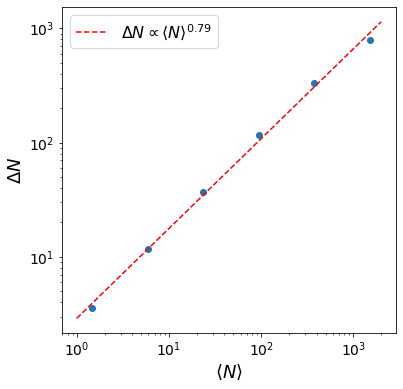

In [279]:
x=np.linspace(1,2*10**3,100)
y=lambda x: np.exp(olsfit.params[0] + olsfit.params[1]*np.log(x))
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(gnf_n.stack().mean()[:-4], gnf_n.stack().std()[:-4])
ax.set_ylabel('$\Delta N$', fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\langle N \rangle$', fontsize=18)
ax.tick_params(labelsize=14)
#ax2 = plt.twinx(ax)
ax.plot(x, y(x), 'r--')
ax.legend([r'$\Delta N \propto \langle N \rangle^{0.79}$'], fontsize=16)
#ax2.set_yscale('log')
#ax2.set_xscale('linear')

In [139]:
import statsmodels.api as sm

In [257]:
olsfit.params[1]

0.7861548299154477

array([[0.        , 0.38692919],
       [0.        , 4.95104417],
       [0.        , 6.22766264],
       [0.        , 7.0036567 ],
       [0.        , 7.56420569],
       [0.        , 8.00028993],
       [0.        , 8.35835517],
       [0.        , 8.66114979]])

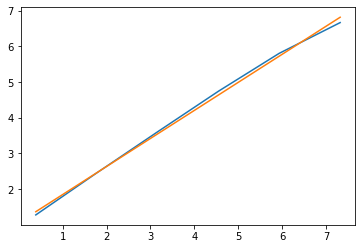

In [245]:
X = np.log(gnf_n.stack().mean()[:-4].values)
y = np.log(gnf_n.stack().std()[:-4].values)
plt.figure()
plt.plot(X, y)
ytheory = lambda x: olsfit.params[0] + olsfit.params[1]*x
plt.plot(X, ytheory(X))
plt.show()

In [244]:
X = sm.add_constant(X)
olsfit = sm.GLM(y, X).fit()
olsfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                        0.012930
Method:                          IRLS   Log-Likelihood:                 5.7473
Date:                Fri, 06 Mar 2020   Deviance:                     0.051721
Time:                        20:08:29   Pearson chi2:                   0.0517
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0639      0.089     11.995      0.000       0.890       1.238
x1             0.7862      0.020     40.104      0.000       0.748       0.825
==============================================================================
"""